In [1]:
import utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "../data/microarray_dataset_with_cancer_chr_pos_preprocessed.tsv"

# methyLImp parameters

100%|██████████| 10/10 [57:48<00:00, 346.83s/it]


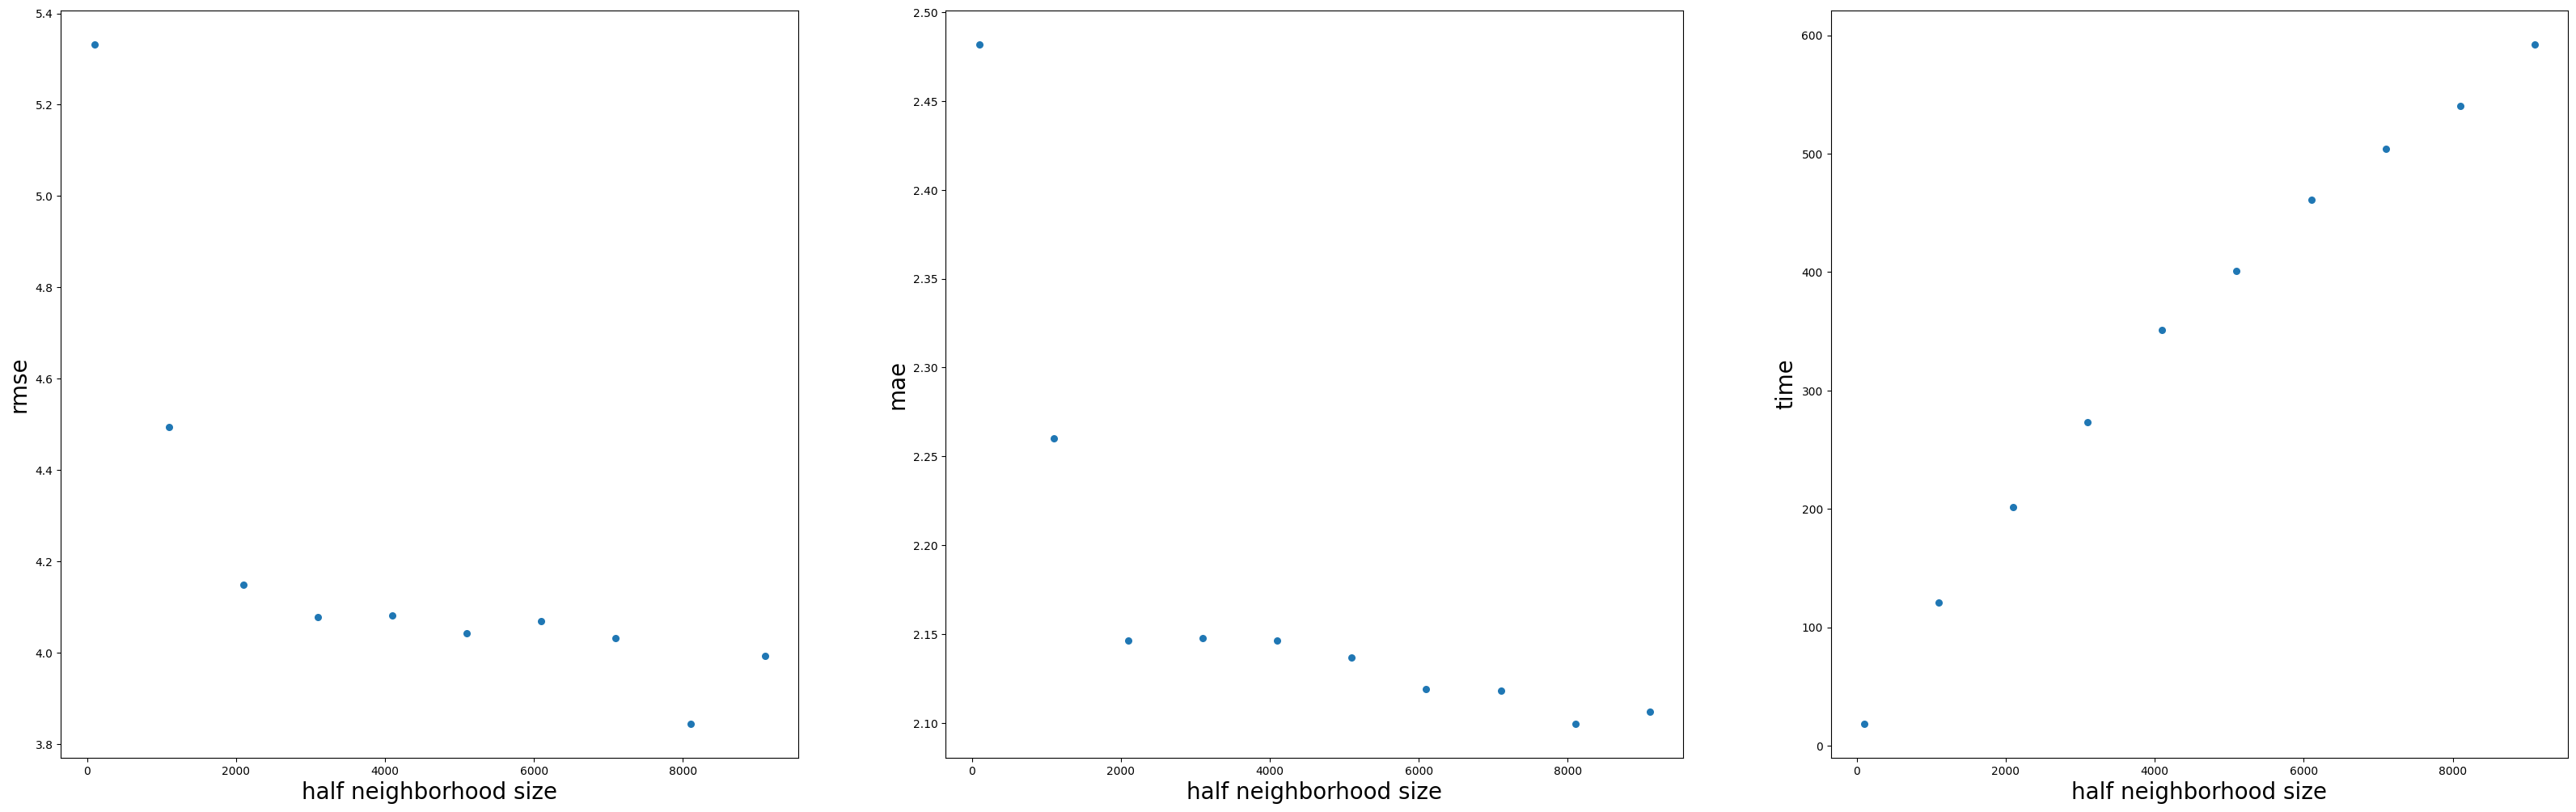

In [6]:
eps_arr = np.arange(100, 10000, 1000)
rmse_lst, mae_lst, time_lst = utils.methyLImp_eps_dependence(filename, eps_arr, p_impute=0.2)

fig, axes = plt.subplots(1, 3, figsize=(40, 12))

for ax, data, name in zip(axes, [rmse_lst, mae_lst, time_lst], ["rmse", "mae", "time"]):
    ax.scatter(eps_arr, data, s=30)
    ax.set_xlabel("half neighborhood size", fontsize=20)
    ax.set_ylabel(name, fontsize=20)

plt.show()

# nbp parameters

  0%|          | 0/50 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 50/50 [02:52<00:00,  3.46s/it]


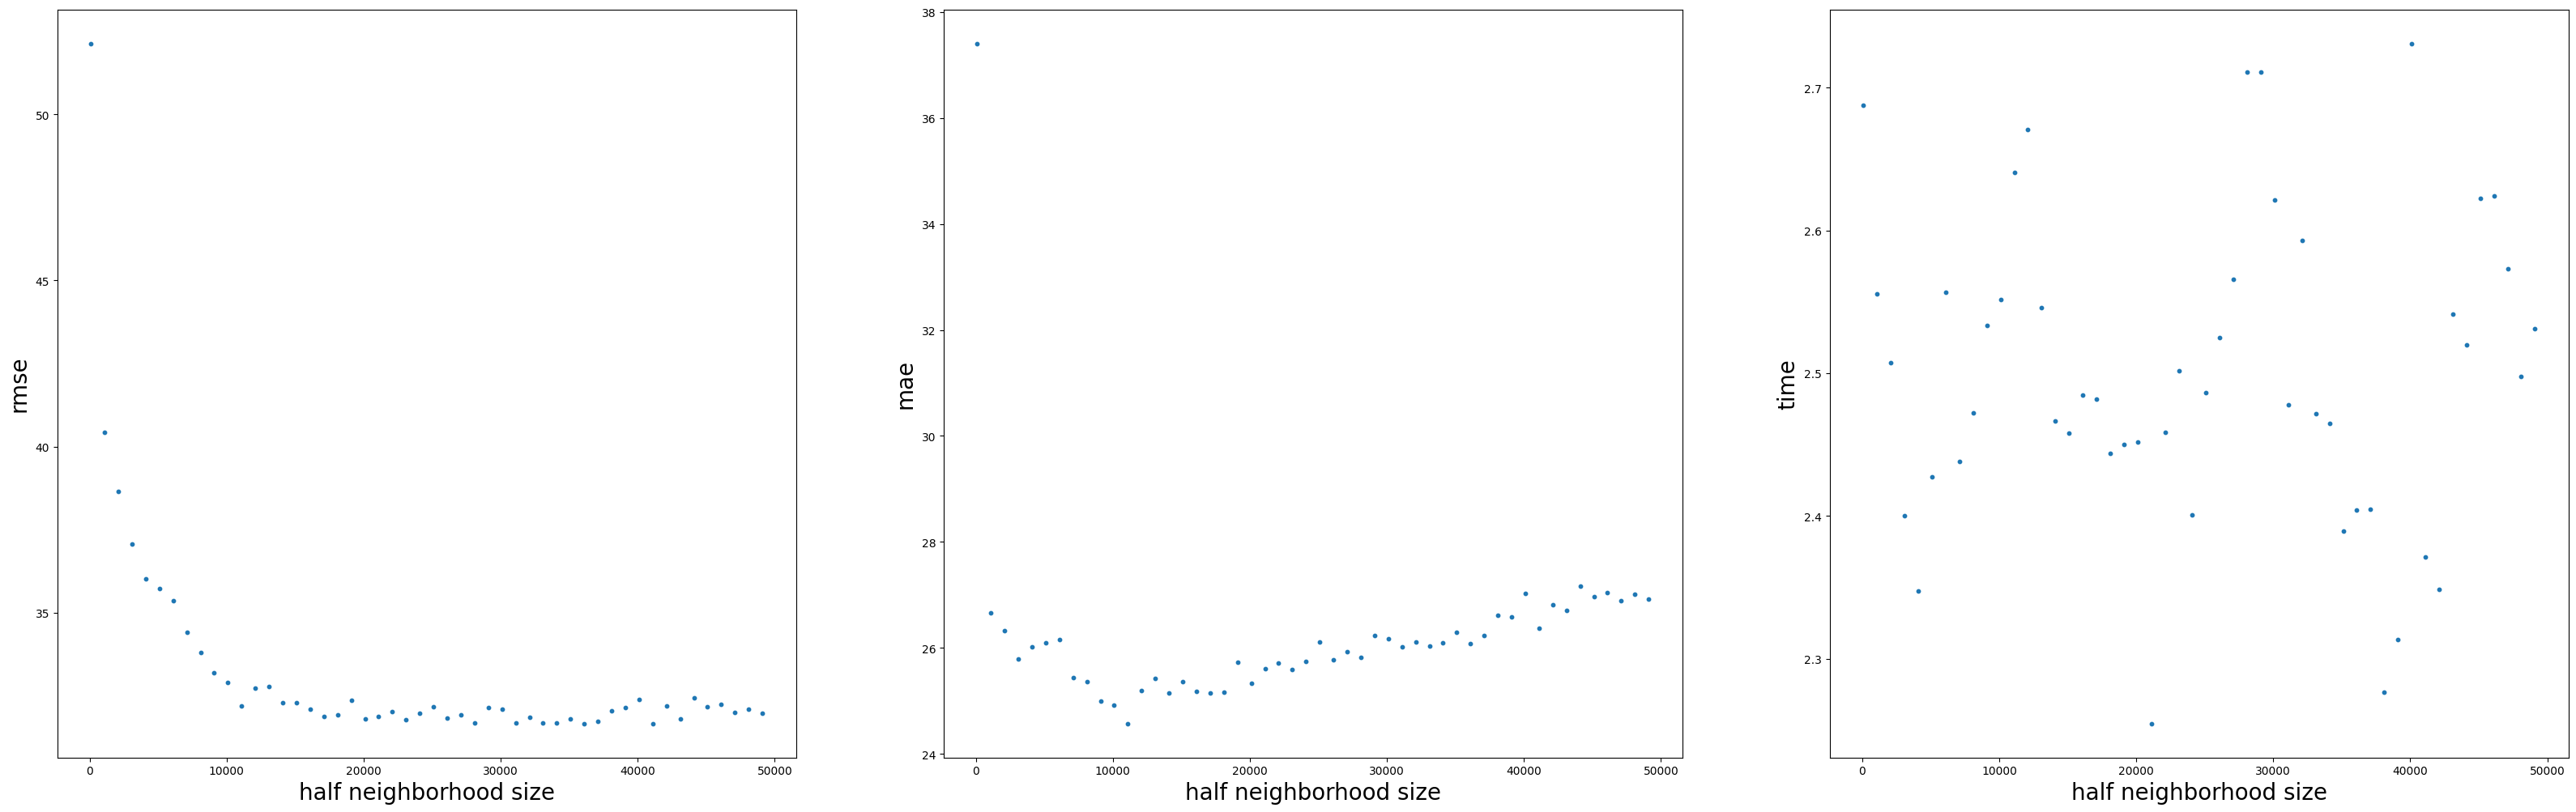

In [3]:
eps_arr = eps_arr = np.arange(100, 50000, 1000)
rmse_lst, mae_lst, time_lst = utils.nbp_eps_dependence(filename, eps_arr, p_impute=0.1)

fig, axes = plt.subplots(1, 3, figsize=(40, 12))

for ax, data, name in zip(axes, [rmse_lst, mae_lst, time_lst], ["rmse", "mae", "time"]):
    ax.scatter(eps_arr, data, s=10)
    ax.set_xlabel("half neighborhood size", fontsize=20)
    ax.set_ylabel(name, fontsize=20)

plt.show()

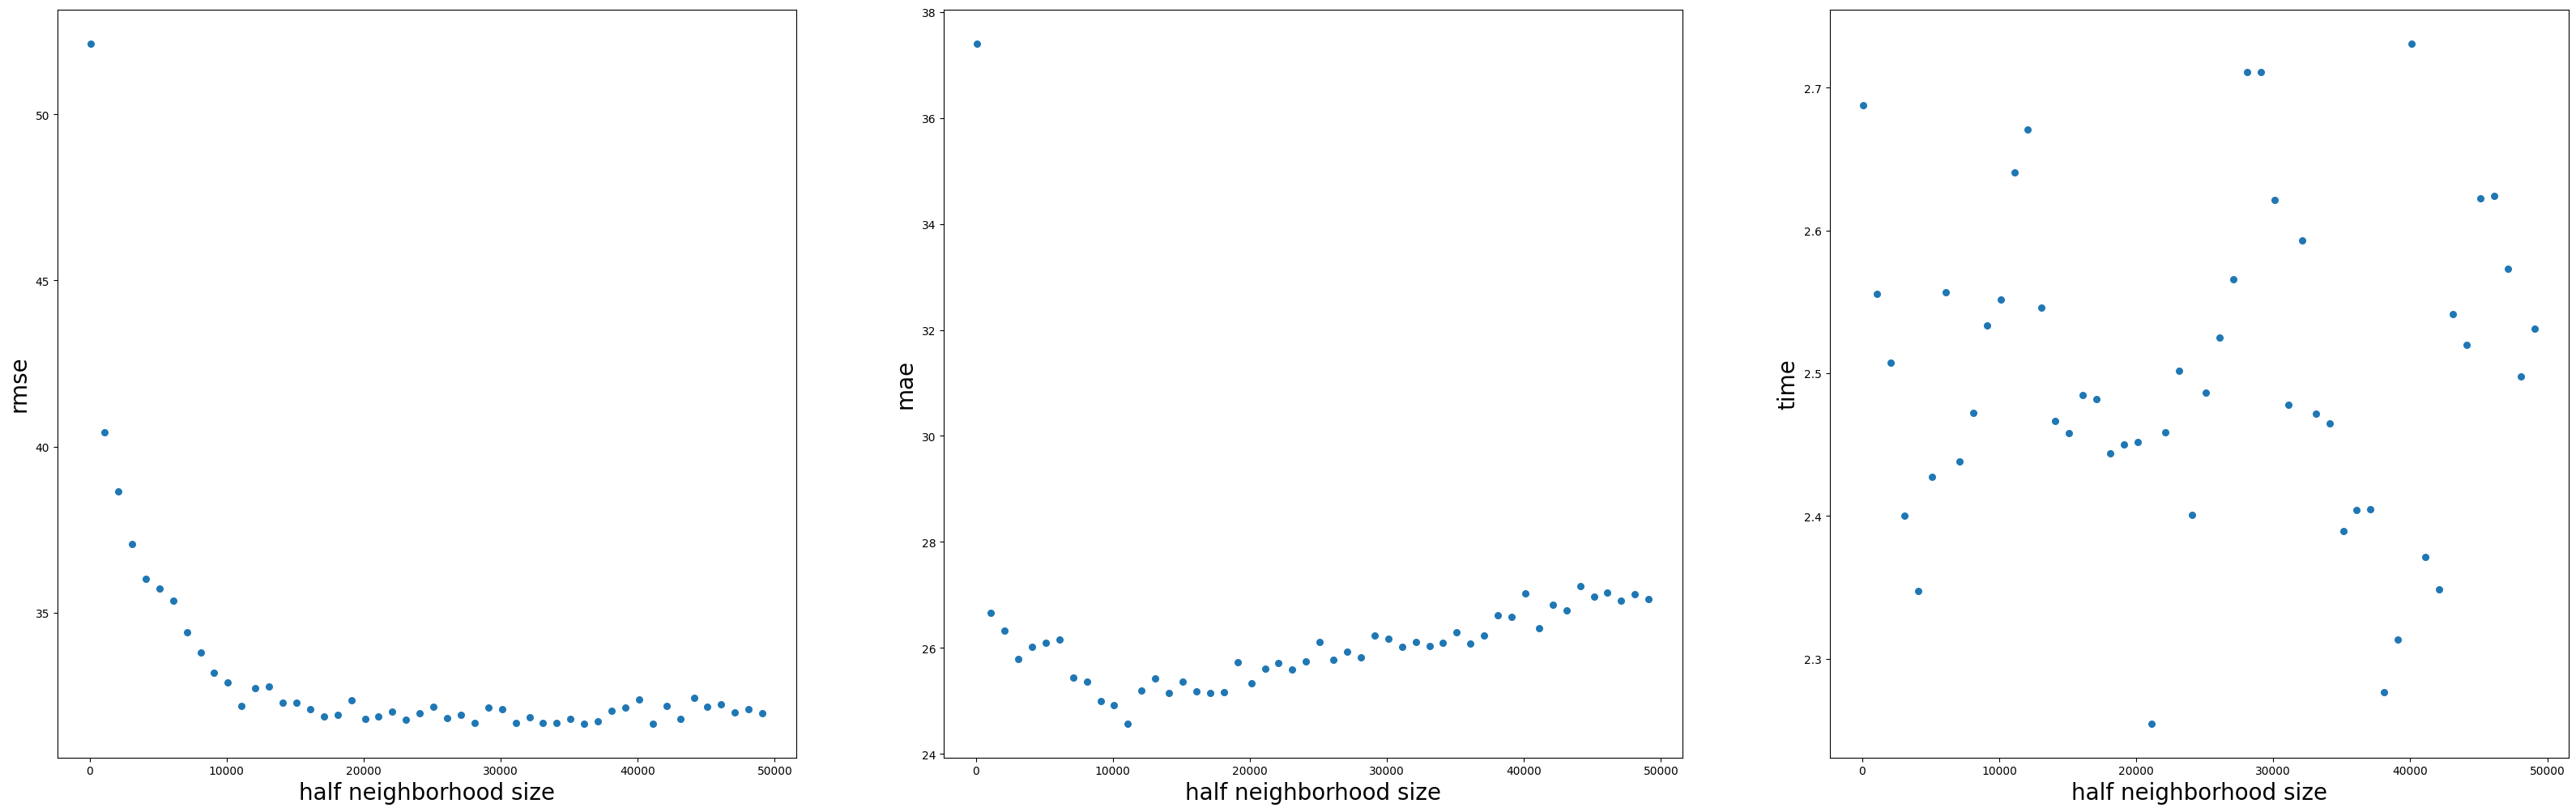

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(40, 12))

for ax, data, name in zip(axes, [rmse_lst, mae_lst, time_lst], ["rmse", "mae", "time"]):
    ax.scatter(eps_arr, data, s=30)
    ax.set_xlabel("half neighborhood size", fontsize=20)
    ax.set_ylabel(name, fontsize=20)

plt.show()

In [7]:
benchmark_tables = utils.create_benchmark_table(filename, 20, 4000, 1000, p_impute=0.1, verbose=1)
benchmark_table_rmse, benchmark_table_mae = benchmark_tables

  0%|          | 0/4 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 4/4 [1:20:14<00:00, 1203.72s/it]


In [8]:
benchmark_table_rmse

,nans percent,methyLImp rmse,nbp rmse,cytosine mean rmse,people mean rmse
0,0.0005,3.79 +/- 0.46,41.23 +/- 1.37,4.98 +/- 0.33,35.67 +/- 0.41
1,0.0010,4.06 +/- 0.39,41.42 +/- 1.19,5.26 +/- 0.33,35.78 +/- 0.39
2,0.0050,4.03 +/- 0.15,41.33 +/- 0.37,5.28 +/- 0.11,35.78 +/- 0.1
3,0.0100,4.03 +/- 0.17,41.31 +/- 0.39,5.29 +/- 0.13,35.81 +/- 0.11


In [9]:
benchmark_table_mae

,nans percent,methyLImp mae,nbp mae,cytosine mean mae,people mean mae
0,0.0005,2.06 +/- 0.11,27.3 +/- 1.15,2.89 +/- 0.15,33.39 +/- 0.52
1,0.0010,2.14 +/- 0.09,27.39 +/- 1.08,2.98 +/- 0.11,33.54 +/- 0.48
2,0.0050,2.14 +/- 0.04,27.35 +/- 0.29,3.0 +/- 0.05,33.51 +/- 0.14
3,0.0100,2.14 +/- 0.04,27.27 +/- 0.38,2.99 +/- 0.04,33.56 +/- 0.13


In [10]:
results = utils.run_experiments(filename, 20, 3000, 300, p_arr=[0.01], verbose=2)

  0%|          | 0/1 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 1/1 [01:55<00:00, 115.67s/it]


In [11]:
methods = ["methyLImp", "nbp", "cytosine mean", "people mean"]

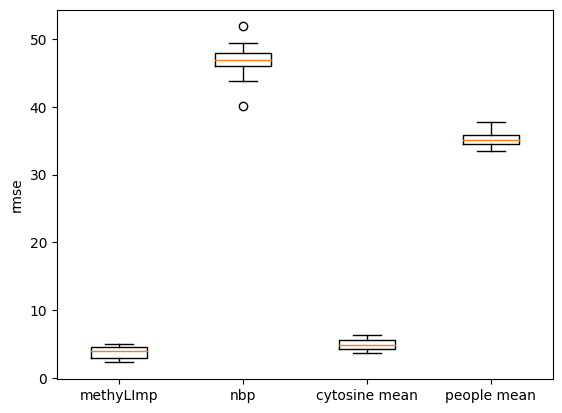

In [12]:
plt.boxplot([results[method + " rmse"][0] for method in methods[:4]], labels=methods)
plt.ylabel("rmse")
plt.show()

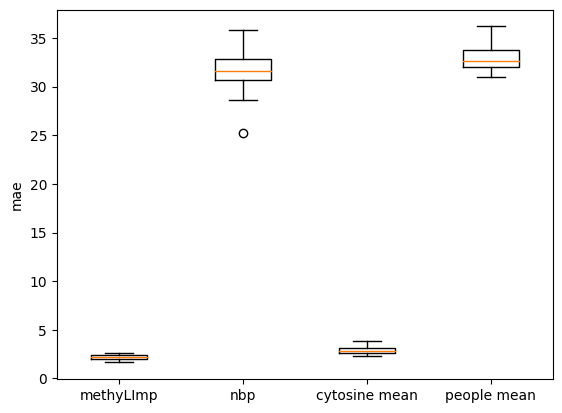

In [13]:
plt.boxplot([results[method + " mae"][0] for method in methods[:4]], labels=methods)
plt.ylabel("mae")
plt.show()

In [14]:
del results["nans percent"]
for key in results.keys():
    results[key] = np.array(results[key][0])
np.savez("boxplot_data_microarray_1_percent.npz", **results)